#### This is a notebook version of the backend demonstrating the basic features.

NOTE--color quantization performed according to scikit-learn docs: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

done in 0.281s.
Predicting color indices on the full image (k-means)
done in 0.048s.


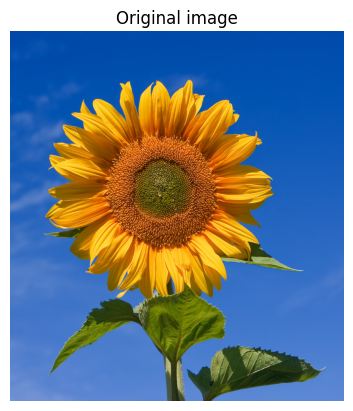

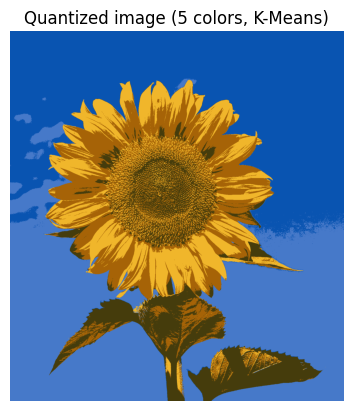

In [47]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.utils import shuffle
from time import time

n_colors = 5

im = Image.open("images/sunflower.jpg")
image = np.asarray(im)

# convert to floats
image = np.array(image, dtype=np.float64) / 255

# get 2d numpy array for training
w, h, d = original_shape = tuple(image.shape)
image_array = np.reshape(image, (w * h, d))

t0 = time()
image_array_sample = shuffle(image_array, random_state=0)
kmeans = MiniBatchKMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(image)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))